In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
# now lets look at the columns
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#this will tell us the columns and rows in the dat
df.shape

(303, 14)

In [7]:
#lets see if the data has mismatching columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [8]:
# check to see if their any missing values.
df.isna().any().any()


False

In [9]:
# there seem to be no missing values now lets remove any duplicate values in the dataframe

In [10]:

#proves no missing values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)


In [ ]:
# now we strandarsise the data using scaler 

In [12]:
scaler.fit(df.drop("output", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(df.drop("output", axis=1))

In [14]:
df1 = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [52]:
# we randomise the data
df1 = shuffle(df1)


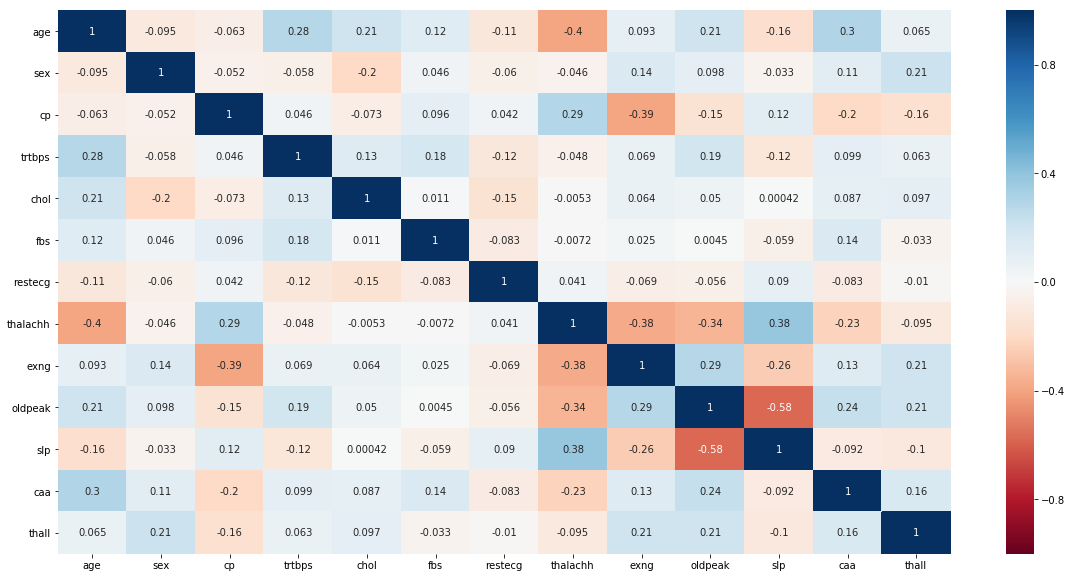

In [53]:
#correclation heatmap
plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize']=(20,10)
corr = df1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu', vmax=1 , vmin=-1, annot=True)

In [17]:
df1.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090


In [20]:
X = df1
y= df['output']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=42) 
   

In [23]:
# KNN MODEL

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
pred = knn.predict(X_test)

In [27]:
print(confusion_matrix, (pred))
print(classification_report(y_test,pred))

<function confusion_matrix at 0x00000204403D08C8> [0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0
 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0]
             precision    recall  f1-score   support

          0       0.47      0.55      0.51        42
          1       0.55      0.47      0.51        49

avg / total       0.51      0.51      0.51        91



In [48]:
error_rate= []

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0,0.5,'error rate')

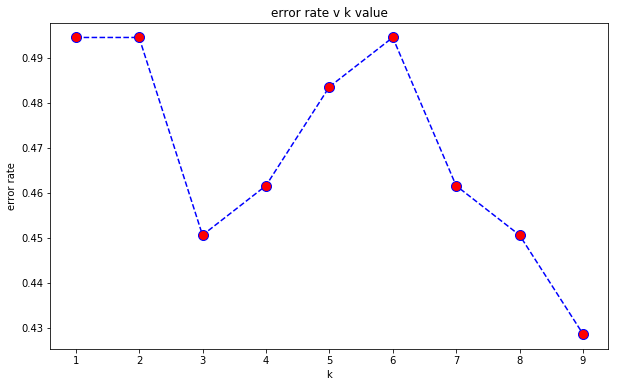

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='Blue', linestyle="--", marker="o",markerfacecolor="red",markersize=10)
plt.title('error rate v k value')
plt.xlabel("k")
plt.ylabel("error rate")

In [51]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print(confusion_matrix, (pred))
print("\n")
print(classification_report(y_test,pred))

<function confusion_matrix at 0x00000204403D08C8> [1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0
 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1]


             precision    recall  f1-score   support

          0       0.55      0.38      0.45        42
          1       0.58      0.73      0.65        49

avg / total       0.57      0.57      0.56        91

